In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
mu_s = [0,0]
cov_s = [[0.09, 0.045], [0.045, 0.09]]

In [4]:
mu_b = [4,4]
cov_b = [[1., 0.4], [0.4, 1.]]

In [5]:
x_s, y_s = np.random.multivariate_normal(mu_s, cov_s, 50000).T
x_b, y_b = np.random.multivariate_normal(mu_b, cov_b, 50000).T

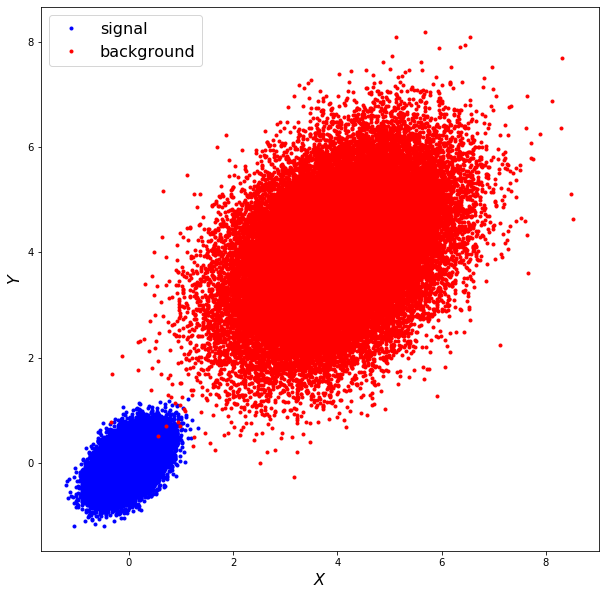

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(x_s, y_s, '.', color = 'blue', label = 'signal')
plt.plot(x_b, y_b, '.', color = 'red', label = 'background')
plt.legend(fontsize=16)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)
plt.show()

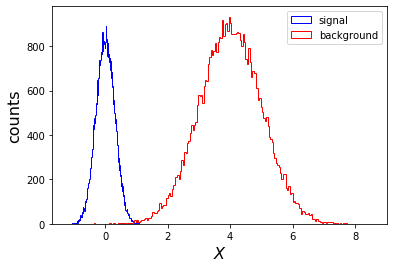

In [7]:
plt.hist(x_s, bins=200, color = 'blue', histtype = 'step', label = 'signal')
plt.hist(x_b, bins=200, color = 'red', histtype = 'step', label = 'background')
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.legend()
plt.show()

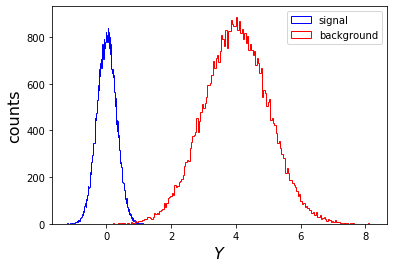

In [9]:
plt.hist(y_s, bins=200, color = 'blue', histtype = 'step', label = 'signal')
plt.hist(y_b, bins=200, color = 'red', histtype = 'step', label = 'background')
plt.legend()
plt.xlabel('$Y$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.show()

In [10]:
x = np.append(x_s,x_b)
y = np.append(y_s,y_b)

In [11]:
s_b = np.array([])
# signal = 1
for i in range (50000):
    s_b = np.append(s_b,1)
# background = 0    
for i in range (50000):
    s_b = np.append(s_b,0)

In [12]:
data = pd.DataFrame(
    {
        'x': x,
        'y': y,
        's_b': s_b
    }
)

In [13]:
data.head()

,x,y,s_b
0,-0.166015,-0.343478,1.0
1,0.310750,0.393779,1.0
2,-0.612241,-0.020968,1.0
3,-0.371653,-0.191997,1.0
4,0.100626,-0.486313,1.0


## Classificazione

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [15]:
data.head()

,x,y,s_b
0,-0.166015,-0.343478,1.0
1,0.310750,0.393779,1.0
2,-0.612241,-0.020968,1.0
3,-0.371653,-0.191997,1.0
4,0.100626,-0.486313,1.0


Il dataset contiene 3 colonne, tra cui è presente il nostro target y = s_b. Tutte gli altri attributi sono features.

Utilizzando il metodo unique possiamo osservare gli elementi unici contenuti in diagnosis, come puoi vedere questa è composta da due valori, 0 e 1, che sono dei label indicanti rispettivamente segnale e fondo.

In [16]:
classes = data["s_b"].unique()
classes

array([1., 0.])

Adesso creiamo due array numpy, uno contenente le features e l'altro il target.

In [17]:
X = data[['x', 'y']]
Y = data['s_b']

Per poter valutare la qualità del nostro modello dobbiamo suddividere il nostro dataset in 2 set differenti:

1. un train set: che ci servirà per addestrare il modello.
2. un test set: che ci servirà per testarlo.

Questa suddivisione è necessaria per verificare che il modello abbia effettivamente imparato qualcosa e che sia in grado di generalizzare su dati non visti durante l'addestramento.

Possiamo eseguire la suddivisione utilizzando la funzione train_test_split, assegnando il 70% dei dati al train set e il 30% al test set.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

La classe `fit_transform` è una scorciatoia che equivale a chiamare prima fit e poi transform sui dati passati come parametro.

Prima di costruire un modello bisogna essere sicuri che i dati siano sulla stessa scala, altrimenti si rischia che questo attribuisca maggiore importanza alle features con magnitudine maggiore. Riprendiamo un momento il nostro DataFrame, selezioniamo solo le nostre due features e utilizziamo il metodo describe per ottenere le informazioni statistiche.

In [19]:
data.describe()

,x,y,s_b
count,100000.000000,100000.000000,100000.000000
mean,2.000589,1.998014,0.500000
std,2.132785,2.130378,0.500003
min,-1.208962,-1.204008,0.000000
25%,0.000230,0.001414,0.000000
50%,0.923783,0.914121,0.500000
75%,3.998509,3.999290,1.000000
max,8.528203,8.191744,1.000000


Osservando i valori minimi e massimi delle due colonne puoi vedere che la colonna `y` si trova in un range di valore maggiore rispetto a `x`. Per portare le features su di una scala comune abbiamo due possibilità:
1. Normalizzare: portare tutti i dati in un range compreso tra 0 e 1.
2. Standardizzare: creare una distribuzione normale, cioè con media 0 e deviazione standard 1.

Optiamo per la standardizzazione, possiamo eseguirla utilizzando la classe trasformatore StandardScaler di scikit-learn.

In [20]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso siamo pronti per creare il nostro modello di classificazione, il modello che implementeremo è la regressione logistica, che oltre alla classe di appartenenza restituisce anche la probabilità di quanto la classificazione sia corretta.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Abbiamo il nostro modello! E ora? Adesso dobbiamo valutare quanto effettivamente sia buono, per farlo possiamo utilizzare il test set e due metriche:

1. Accuracy: semplicemente conta quante delle classificazioni fatte dal modello sono corrette, ritorna un valore tra 0 e 1, maggiore è meglio
2. Negative Log-likelihood (log loss): tiene conto della probabilità, ritorna un valore tra 0 ed 1, minore è meglio

Entrambe le funzioni sono implementate in scikit-learn

In [22]:
# predizione del target Y su X_test
Y_pred = lr.predict(X_test)
# probabilità di predizione corretta
Y_pred_proba = lr.predict_proba(X_test)
# accuracy, calcolata vedendo le differenze tra Y_test e Y_pred
A = accuracy_score(Y_test, Y_pred)
# log_loss, calcolata vedendo Y_test e la probabilità di correttezza di Y_pred
LL = log_loss(Y_test, Y_pred_proba)
# stampo entrambe
print('ACCURACY = ', round(A,2))
print('LOG LOSS = ', round(LL,2))

ACCURACY =  1.0
LOG LOSS =  0.0


Se volessimo vedere tutti i valori classificati in modo errato nel nostro dataset potremmo semplicemente usare il modello per stimare nuovamente la classificazione di tutti i dati nel nostro dataset e quindi stampare i valori con predizione diversa dalla diagnosi:

In [23]:
data_new = pd.DataFrame(
    {
        'Y_test': Y_test,
        'Y_pred': Y_pred
    }
)

Calcolo i falsi positivi:

In [24]:
data_new.loc[(data_new.Y_test != data_new.Y_pred) & (data_new.Y_test == 0)]

,Y_test,Y_pred
97440,0.0,1.0
75104,0.0,1.0
56981,0.0,1.0
57621,0.0,1.0
81963,0.0,1.0
72618,0.0,1.0
51492,0.0,1.0
81426,0.0,1.0


In [25]:
len(data_new.loc[(data_new.Y_test == 0)])

15005

In [26]:
len(data_new.loc[(data_new.Y_test == 1)])

14995

e calcolo i falsi negativi:

In [27]:
data_new.loc[(data_new.Y_test != data_new.Y_pred) & (data_new.Y_test == 1)]

,Y_test,Y_pred


## confusion matrix

Visualizziamo cosa il modello ha imparato all'interno di un grafico.

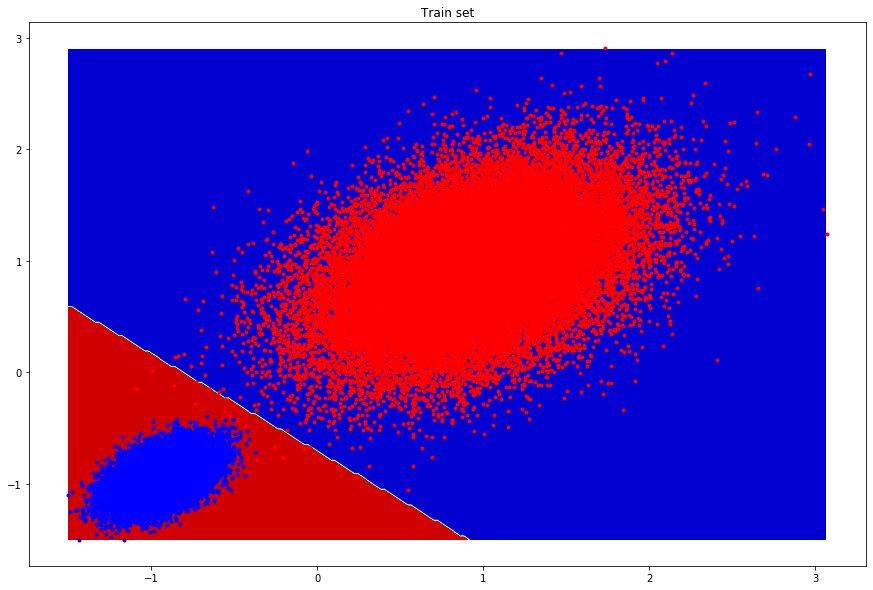

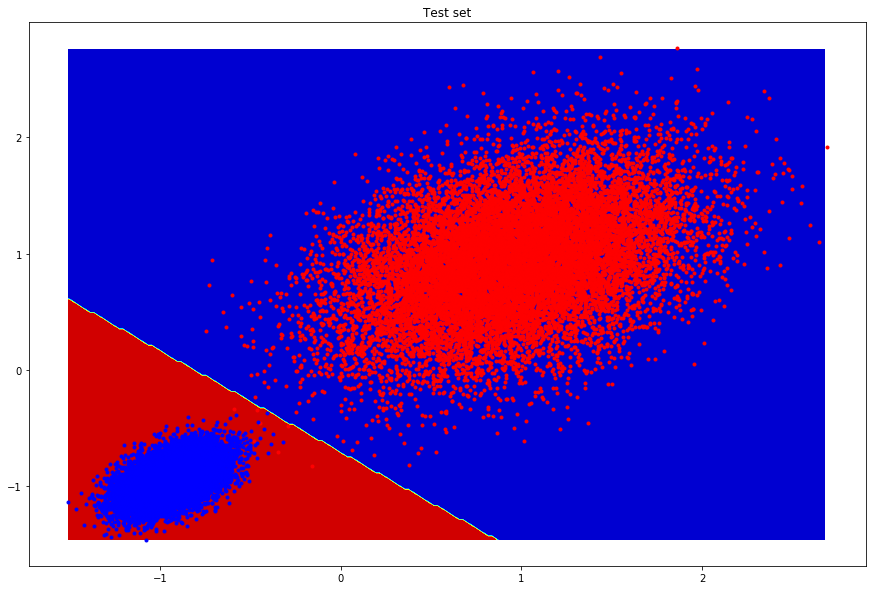

In [29]:
def showBounds(X, Y, model, title=None):
    fig = plt.figure(figsize=(15,10))
    h = .02 
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.jet)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.title(title)
    plt.scatter(X_b[:, 0], X_b[:, 1], marker='.', c='red')
    plt.scatter(X_m[:, 0], X_m[:, 1], marker='.', c='blue')
    plt.show()
    
showBounds(X_train, Y_train, lr, title='Train set')
showBounds(X_test, Y_test, lr, title='Test set')